이전의 선형, 다중회귀에선 여전히 과소적합이 존재했다.

이번엔 많은 특성을 사용하는 다중 회귀 모델을 사용해보자.

# 특성 공학
기존의 특성들을 조합해 새로운 특성을 만드는 작업


In [60]:
#pandas를 통해 데이터를 인터넷에서 불러오는 것으로 시작하지.
import pandas as pd
df = pd.read_csv('https://bit.ly/perch_csv')
perch_full = df.to_numpy()
print(perch_full[:5])

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]]


In [61]:
import numpy as np
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [62]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state = 42)

In [63]:
#사이킷런의 변환기를 통해 새로운 특성을 조합해보자.
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures()
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))
#나온 새로운 특성들은 기존의 값들의 제곱, 곱한 값들로 구성된다.
#1은 절편 값이 곱해지는 특성

[[1. 2. 3. 4. 6. 9.]]


In [64]:
# 사이킷런의 회귀 모델들은 자동으로 절편을 추가하니까 절편에 해당하는 값은 필요없다.
poly = PolynomialFeatures(include_bias = False)
poly.fit([[2,3]])
print(poly.transform([[2, 3]]))

[[2. 3. 4. 6. 9.]]


In [65]:
poly = PolynomialFeatures(include_bias = False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape)

(42, 9)


In [66]:
poly.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

In [67]:
test_poly = poly.transform(test_input)

In [68]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9903183436982124
0.9714559911594134


In [69]:
#더 많은 특성을 훈련시키면 어떤 결과일지 확인해보자.

poly = PolynomialFeatures(degree = 5, include_bias = False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)

(42, 55)


In [70]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

#train data에 너무 강력하게 맞춰진 나머지 나머지 데이터에 대한 예측이 어려워진다 .-> 과대 적합

0.9999999999991097
-144.40579242684848


# 규제
머신러닝 모델의 과대적합을 막기위해 훼방하는 것. ( 특성에 곱해지는 계수의 크기를 작게 만든다. )

규제를 한 모델을 릿지와 라쏘라고 부른다.
+ 릿지 : 계수를 제곱한 값을 기준으로 규제 적용
+ 라쏘 : 계수의 절대값을 기준으로 규제 적용

보통 릿지를 더 선호

### 스케일링
특성의 스케일이 정규화 되지 않으면 계수의 값도 차이가 많이 나게 된다.

In [46]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

## 릿지 회귀

In [47]:
#먼저 릿지 회귀를 알아보자.
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9896101671037343
0.9790693977615391


In [48]:
#규제의 강도는 alpha 매개변수를 통해 조절할 수 있다.
#alpha가 커지면 규제 강도가 세지고, alpha가 작아지면 규제 강도가 약해진다.

import matplotlib.pyplot as plt

#각 알파값에 따른 정확도를 저장 할 리스트를 만듬
train_score = []
test_score = []

In [49]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list:
  ridge = Ridge(alpha = alpha)
  ridge.fit(train_scaled, train_target)
  train_score.append(ridge.score(train_scaled, train_target))
  test_score.append(ridge.score(test_scaled, test_target))

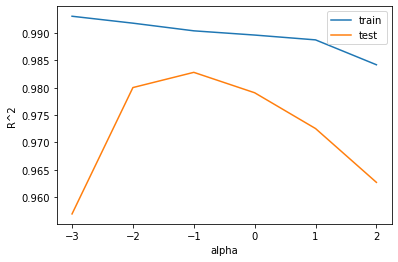

In [34]:
#alpha_list의 값은 10배씩 늘어나기때문에 이대로 그래프를 그리면 x축의 초반이 너무 촘촘해진다.
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend(['train', 'test'])
plt.show()

# alpha값이 0.1일때 훈련-테스트 데이터의 정확도가 가장 가까우며 테스트케이스의 정확도 또한 가장 높다.

In [50]:
ridge = Ridge(alpha = 0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570365
0.9827976465386884


##라쏘 회귀

In [53]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.989789897208096
0.9800593698421883


In [56]:
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
  lasso = Lasso(alpha = alpha, max_iter = 10000)
  lasso.fit(train_scaled, train_target)
  train_score.append(lasso.score(train_scaled, train_target))
  test_score.append(lasso.score(test_scaled, test_target))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


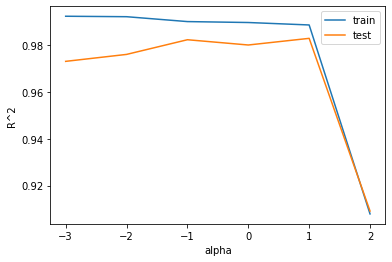

In [57]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend(['train', 'test'])
plt.show()

In [58]:
lasso = Lasso(alpha = 10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


In [59]:
print(np.sum(lasso.coef_ == 0))

#실제로 사용된 특성은 15개이며 40개의 특성에 대한 계수는 0이 되었다.
# -> lasso를 통해 유용한 특성이 어떤것인지 골라낼 수 있을 것이다.

40
